In [1]:
from aocd import data
from copy import copy
import numpy as np
from rich.progress import track
import matplotlib.pyplot as plt

In [2]:
#data = \
"""O....#....
O.OO#....#
.....##...
OO.#O....O
.O.....O#.
O.#..O.#.#
..O..#O..O
.......O..
#....###..
#OO..#...."""

'O....#....\nO.OO#....#\n.....##...\nOO.#O....O\n.O.....O#.\nO.#..O.#.#\n..O..#O..O\n.......O..\n#....###..\n#OO..#....'

In [3]:
platform = np.array([list(line) for line in data.splitlines()])
cubes = { tile: cube for tile, cube in np.ndenumerate(platform) if cube == '#' }
rocks = { tile: rock for tile, rock in np.ndenumerate(platform) if rock == 'O' }

In [4]:
def in_bounds(direction):
    return 0 <= direction[0] < platform.shape[0] and 0 <= direction[1] < platform.shape[1]

def has_cube(direction):
    return cubes.get(direction, False)

def has_rock(direction):
    return rocks.get(direction, False)

def can_roll(direction):
    return in_bounds(direction) and not has_cube(direction) and not has_rock(direction)

def tilt(step):
    while True:
        previous = copy(rocks)
        for (x, y), rock in previous.items():
            direction = step(x, y)
            if can_roll(direction):
                del rocks[x, y]
                rocks[direction] = rock
        if rocks == previous:
            break

def tilt_north():  tilt(step=lambda x, y: (x-1, y))
def tilt_west():   tilt(step=lambda x, y: (x, y-1))
def tilt_souch():  tilt(step=lambda x, y: (x+1, y))
def tilt_east():   tilt(step=lambda x, y: (x, y+1))

def cycle():
    tilt_north()
    tilt_west() 
    tilt_souch()
    tilt_east()

def load():
    rolled = np.zeros_like(platform, dtype=bool)
    for (x, y), rock in rocks.items():
        rolled[x, y] = True
    load = 0
    for mul, x in enumerate(range(platform.shape[0]-1, -1, -1), 1):
        load += mul * np.count_nonzero(rolled[x, :])
    return load

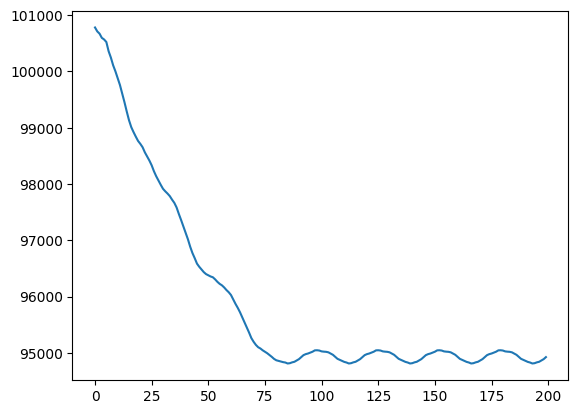

In [5]:
loads = []
for _ in range(200):
    cycle()
    loads.append(load())

plt.plot(loads)

In [27]:
max(loads[75:]) # 95046
loads[98]
loads[125]
loads[152]

(1_000_000_000 - 98) % 27
loads[108]

94876

In [6]:
rolled = np.zeros_like(platform, dtype=bool)
for (x, y), rock in rocks.items():
    rolled[x, y] = True

In [7]:
for row in rolled:
    print(''.join('O' if rock else '.' for rock in row))

..............OO.......................O...............................O....O.....................OO
.............................................OO.........O...........................O........OO....O
....................................O.O...OO..............OOOOOO........O.........OOO....OOO.....O..
........OO........OO...........O............OOOOOOO.O..................O..O......O.....OO....OOOOO..
........OOO.............................OO.............OOOOOOOO..........OO............O..O...OOO...
..O..O..............O...................O...O.O...OO...........................OOOOOOOOOOOO.....OOOO
....O.....O.............................OO.................OOOOOO...OOOOO.......OO.....OO.O.....OO..
.......OOO...................O....O..........OOO.....O........O.O.O....OOO..O........OO....O......O.
......O..............O............O..........O.....O...............OOOOOO............OO.............
..................OOOO..........O................O............OO...O...........OOO..O......